In [1]:
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from linear_regression import LinearRegression as MyLinearRegression

(700, 3) (300, 3) (700, 1) (300, 1)
real coef [16.07232488 58.29033874 39.82919608]
real bias 2.4


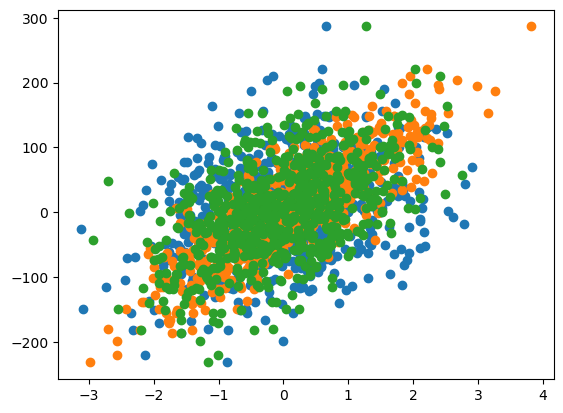

In [2]:
# make fake data
real_bias = 2.4
x, y, real_coef = make_regression(n_samples=1000, n_features=3, n_informative=3, n_targets=1, bias=real_bias, coef=True)  
x = x.reshape(-1, 1) if x.ndim == 1 else x
y = y.reshape(-1, 1) if y.ndim == 1 else y

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print("real coef", real_coef)
print("real bias", real_bias)

plt.scatter(x_train[:, 0], y_train)
plt.scatter(x_train[:, 1], y_train)
plt.scatter(x_train[:, 2], y_train)
plt.show()

In [3]:
# fit
sklearn_linreg = LinearRegression().fit(x_train, y_train)
my_linreg = MyLinearRegression().fit(x_train, y_train)

100 loss 670.9954948685661
200 loss 82.35177476257194
300 loss 10.411591308088962
400 loss 1.3565303748305826
500 loss 0.18196530008241732
600 loss 0.02507695233815992
700 loss 0.0035403508159505075
800 loss 0.0005104218774379273
900 loss 7.491577790263677e-05
1000 loss 1.1162233794300201e-05
1100 loss 1.684242690931618e-06
1200 loss 2.568336795484383e-07
1300 loss 3.9515870641213655e-08
1400 loss 6.1260057731018764e-09
1500 loss 9.558561464323823e-10
1600 loss 1.4997726127004203e-10
1700 loss 2.364561864299574e-11
1800 loss 3.743641657975662e-12
1900 loss 5.948704448160658e-13
2000 loss 9.482729300417974e-14


In [4]:
# predict
sklearn_mse = metrics.mean_squared_error(y_test, sklearn_linreg.predict(x_test))
my_mse = metrics.mean_squared_error(y_test, my_linreg.predict(x_test))
sklearn_mse, my_mse

(2.158469375952154e-27, 1.0361725501309768e-13)

In [5]:
# see the actual coef and intercept, very close!
print("sklearn", sklearn_linreg.coef_, sklearn_linreg.intercept_)
print("mine", my_linreg.w, my_linreg.b)
print("real", real_coef, real_bias)

sklearn [[16.07232488 58.29033874 39.82919608]] [2.4]
mine [[16.07232483]
 [58.29033876]
 [39.82919577]] [2.40000002]
real [16.07232488 58.29033874 39.82919608] 2.4
